In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import matchY,measures_calculator
import api
imp.reload(api)

import hdbscan
from QuickshiftPP import *
from Spectacl import Spectacl
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

from measures import matchY

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [2]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

def get_moons(noise,seed=2020):
    np.random.seed(seed)
    scaler = MinMaxScaler(feature_range=(0, 3))
    moons, labels = datasets.make_moons(n_samples=2000, noise=noise)
    scaler.fit(moons)
    moons = scaler.transform(moons)
    return moons,labels

def get_circles(noise,seed=2020):
    np.random.seed(seed)
    scaler = MinMaxScaler(feature_range=(0, 3))
    circles, labels = datasets.make_circles(n_samples=2000, noise=noise,factor=0.4)
    scaler.fit(circles)
    circles = scaler.transform(circles)
    return circles,labels


class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name== 'circles':
            X,Y_true = get_circles(0.15)
            mask = Y_true==0
            circle3 = X[mask]*2
            X = np.concatenate([X,circle3],axis=0)
            Y_true = np.concatenate([Y_true,np.zeros(circle3.shape[0])+2])
            return X,Y_true
        
        if name=='moons':
            X,Y_true = get_moons(0.15)
            return X,Y_true
        
        if name=='impossible':
            df=pd.read_csv('../data/artificial_csv/impossible_plus.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1].values.astype(np.int)
            return X,Y_true
        
        if name=='s-set':
            df=pd.read_csv('../data/artificial_csv/s-set1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='smile':
            df=pd.read_csv('../data/artificial_csv/smile1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='complex9':
            df=pd.read_csv('../data/artificial_csv/complex9_remove_noise.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='complex8':
            df=pd.read_csv('../data/artificial_csv/complex8.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='chainlink':
            df=pd.read_csv('../data/artificial_csv/chainlink.csv', header=None)
            X=df.values[:,:3]
            Y_true = df.iloc[:,-1]
            return X,Y_true

# circles

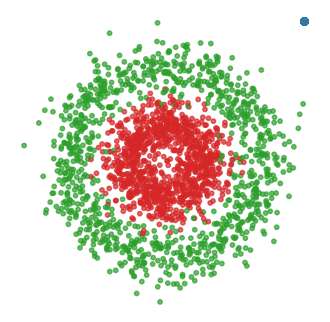

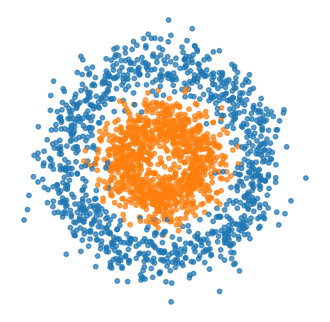

In [5]:
X1,Y_true1 = get_circles(0.15)
X2,Y_true2 = get_circles(0.15)
X2 = -X2*100

X = np.concatenate([X1,X2],axis=0)
Y_true = np.concatenate([Y_true1,Y_true2+2]).astype(np.int)


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_true]
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_raw_1.png',bbox_inches = 'tight',pad_inches = 0.02)


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_true[:2000]]
ax = plt.subplot(111)
ax.scatter(X[:2000][:,0], X[:2000][:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_raw_2.png',bbox_inches = 'tight',pad_inches = 0.02)

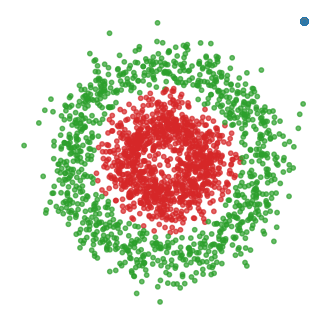

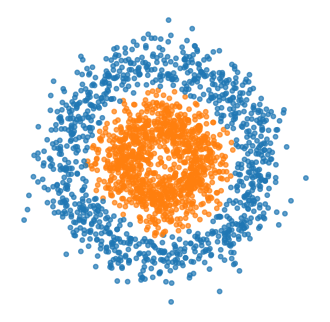

In [6]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=25,
              target_ratio=[1,1,1,1],
              plot=False,
             )
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred]
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_GIT_1.png',bbox_inches = 'tight',pad_inches = 0.02)


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred[:2000]]
ax = plt.subplot(111)
ax.scatter(X[:2000][:,0], X[:2000][:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_GIT_2.png',bbox_inches = 'tight',pad_inches = 0.02)

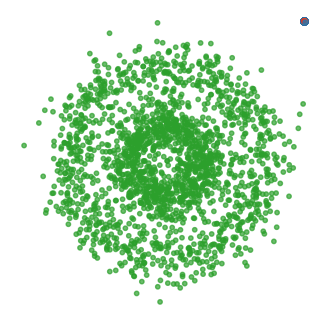

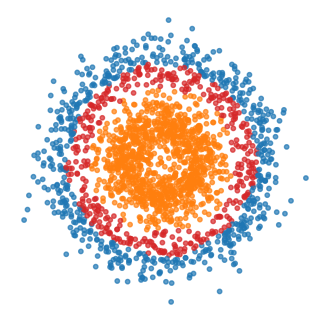

In [7]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=4, epsilon=2).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred]
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_spectralACI_1.png',bbox_inches = 'tight',pad_inches = 0.02)


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred[:2000]]
ax = plt.subplot(111)
ax.scatter(X[:2000][:,0], X[:2000][:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_spectralACI_2.png',bbox_inches = 'tight',pad_inches = 0.02)

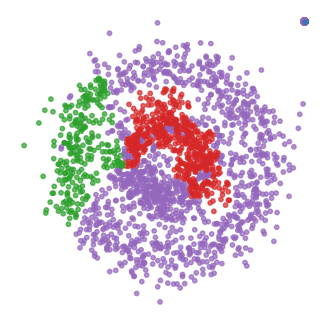

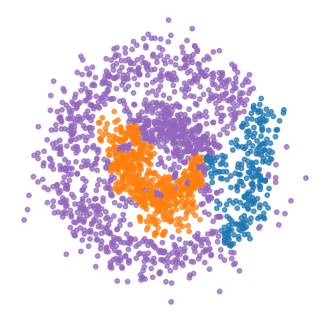

In [8]:
model = QuickshiftPP(k=5,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred]
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_QuickshiftPP_1.png',bbox_inches = 'tight',pad_inches = 0.02)


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred[:2000]]
ax = plt.subplot(111)
ax.scatter(X[:2000][:,0], X[:2000][:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_QuickshiftPP_2.png',bbox_inches = 'tight',pad_inches = 0.02)

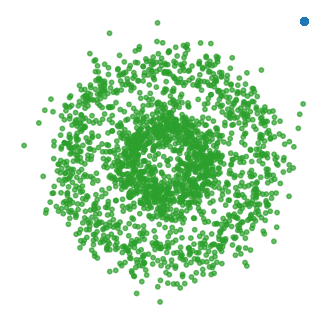

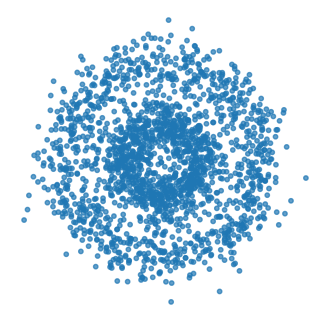

In [9]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=2)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred]
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_HDBSCAN_1.png',bbox_inches = 'tight',pad_inches = 0.02)


plt.figure(figsize=(4, 4),dpi=100)
colors=['C{}'.format(i) for i in Y_pred[:2000]]
ax = plt.subplot(111)
ax.scatter(X[:2000][:,0], X[:2000][:,1],c=colors,s=10,alpha=0.7)
for key, spine in ax.spines.items(): # 取消边框
    spine.set_visible(False)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.savefig('./figs/circles_HDBSCAN_2.png',bbox_inches = 'tight',pad_inches = 0.02)

# moons

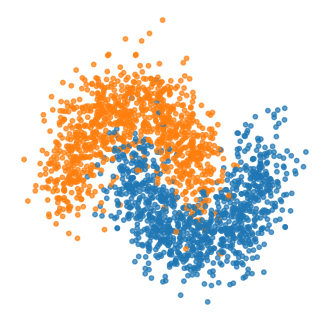

In [10]:
X,Y_true = get_moons(0.25)
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/moons_raw.png',dpi=100)

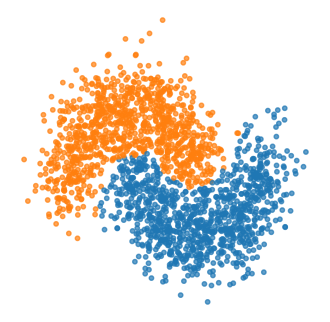

In [11]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=50,
              target_ratio=[1,1],
              plot=False,
             )
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/moons_GIT.png',dpi=100)

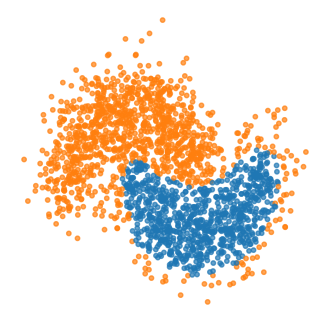

In [12]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=0.3).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/moons_spectralACI.png',dpi=100)

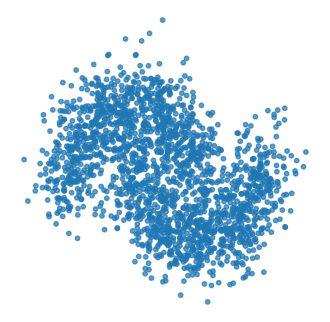

In [13]:
model = QuickshiftPP(k=10,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/moons_QuickshiftPP.png',dpi=100)

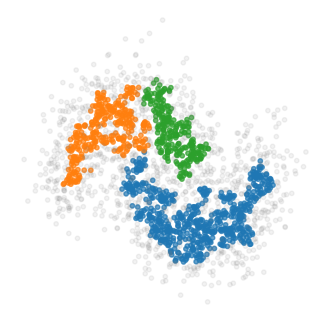

In [14]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/moons_HDBSCAN.png',dpi=100)

# impossible

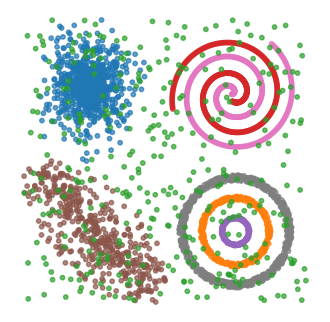

In [15]:
noise_level=10
X_raw,Y_raw=DataLoader.load('impossible')
np.random.seed(2020)
noise = np.random.rand(int(X_raw.shape[0]/100*noise_level),2)*20-10
X = np.concatenate([X_raw,noise],axis=0)
Y_true = np.concatenate([Y_raw,np.zeros(noise.shape[0])+Y_raw.max()+1],axis=0).astype(np.int)
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/impossible_raw.png',dpi=100)

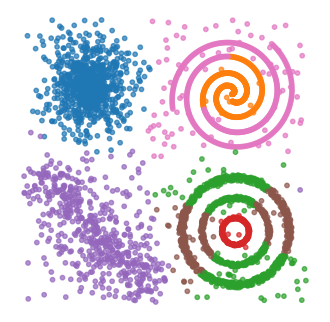

In [16]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=7, epsilon=5).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/impossible_spectACL.png',dpi=100)

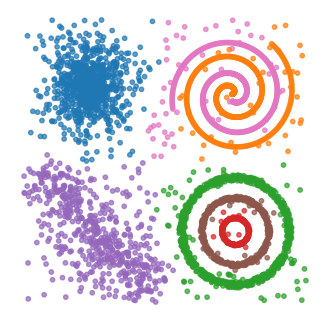

In [17]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=10,
              target_ratio=[2, 2, 1, 1, 1, 1, 1],
              plot=False,
             )
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/impossible_GIT',dpi=100)

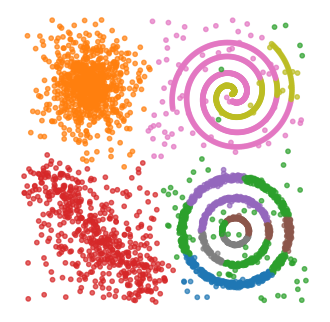

In [18]:
model = QuickshiftPP(k=15,beta=0.7)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/impossible_QuickshiftPP.png',dpi=100)

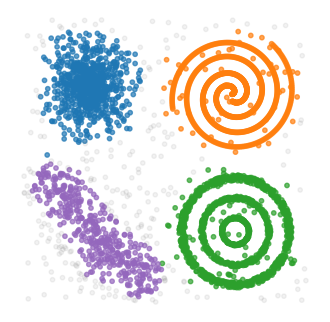

In [19]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=30)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/impossible_HDBSCAN.png',dpi=100)

# moons_change_noise

In [18]:
seeds = [2020,2021,2022,2023,2024,2025,2026,2027,2028,2029]

In [19]:
Fscores_GIT=[]
for noise in [0.02*i for i in range(1,14)]:
    tmp=[]
    for seed in seeds:
        X,Y_true = get_moons(noise,seed)
        Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
              k=50,
              target_ratio=[1,1],
              plot=False,
             )
        Y_pred, Y_true = matchY(Y_pred,Y_true)
        result=measures_calculator(Y_true,Y_pred)
        tmp.append(result.values[0,0])
    Fscores_GIT.append((np.mean(tmp),np.var(tmp)))
print(Fscores_GIT)

[(1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.999799999875, 1.1000017500025094e-07), (0.9990499991624985, 4.225017712566529e-07), (0.9969499949624787, 1.4725051088255069e-06), (0.9928499665121364, 3.202557493790978e-06), (0.9867498472829987, 4.2127688618942925e-06), (0.9790995143605172, 7.191267761267885e-06), (0.9128083429343942, 0.01430805657355605), (0.8791988033047037, 0.010288211793594996), (0.8330702090627364, 0.011444672937916695), (0.7962009641274004, 0.009182745216360859)]


In [20]:
Fscores_sepctACI=[]
for noise in [0.02*i for i in range(1,14)]:
    tmp=[]
    for seed in seeds:
        X,Y_true = get_moons(noise,seed)
        Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=0.3).fit_predict(X)
        Y_pred, Y_true = matchY(Y_pred,Y_true)
        result=measures_calculator(Y_true,Y_pred)
        tmp.append(result.values[0,0])
    Fscores_sepctACI.append((np.mean(tmp),np.var(tmp)))
print(Fscores_sepctACI)

[(1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.9997999998749998, 1.1000017500025094e-07), (0.999299998724996, 4.1000266501561857e-07), (0.9967499925124695, 1.6125109688734737e-06), (0.9925499549870539, 2.0225889792025957e-06), (0.9858497097769148, 7.753952802377141e-06), (0.9759477666289614, 2.5842740280398665e-05), (0.9538108213312222, 9.313424797131238e-05), (0.9164636363283577, 0.0007588905752727831), (0.799242280123628, 0.020483168613603366), (0.7157508016937689, 0.017366183078164482)]


In [21]:
Fscores_QuickshiftPP=[]
for noise in [0.02*i for i in range(1,14)]:
    tmp=[]
    for seed in seeds:
        X,Y_true = get_moons(noise,seed)
        model = QuickshiftPP(k=10,beta=0.9)
        model.fit([X[i] for i in range(X.shape[0])])
        Y_pred = model.memberships
        Y_pred, Y_true = matchY(Y_pred,Y_true)
        result=measures_calculator(Y_true,Y_pred)
        tmp.append(result.values[0,0])
    Fscores_QuickshiftPP.append((np.mean(tmp),np.var(tmp)))
print(Fscores_QuickshiftPP)

[(0.9564856671907987, 0.0015776901561660056), (0.9475037616073425, 0.012104314346393336), (0.995476096040521, 5.760216266494597e-05), (0.9835791741812423, 0.0015127026600579544), (0.9986739840749385, 5.272812702172403e-07), (0.9966969033470949, 3.175012062595292e-06), (0.861060189585469, 0.06933633230511868), (0.46470897142337037, 0.06845929963179503), (0.3335106822403258, 2.830737133026703e-07), (0.33382129795467885, 5.980647792947892e-07), (0.33362131809702433, 3.9270555714313025e-07), (0.33367731574771986, 5.476577675044186e-07), (0.33355536316523315, 1.9718898501380463e-07)]


In [22]:
Fscores_HDBSCAN=[]
for noise in [0.02*i for i in range(1,14)]:
    tmp=[]
    for seed in seeds:
        X,Y_true = get_moons(noise,seed)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10)
        clusterer.fit(X)
        Y_pred=clusterer.labels_
        Y_pred, Y_true = matchY(Y_pred,Y_true)
        result=measures_calculator(Y_true,Y_pred)
        tmp.append(result.values[0,0])
    Fscores_HDBSCAN.append((np.mean(tmp),np.var(tmp)))
print(Fscores_HDBSCAN)

[(1.0, 0.0), (1.0, 0.0), (0.9999499999874999, 2.2500011250007373e-08), (0.999849548229777, 1.032193814481677e-07), (0.9934833070229334, 0.00030772177050025735), (0.998113279641888, 8.612906432615108e-07), (0.9959849899087543, 2.5787926705433006e-06), (0.9921092709558901, 9.38382958313991e-06), (0.9767859018425564, 0.000754010184498187), (0.9205497005065768, 0.013161448341503092), (0.8549023856580564, 0.03149074044363938), (0.7115235717779077, 0.028938607073854143), (0.6222839127403529, 0.02825167367843199)]


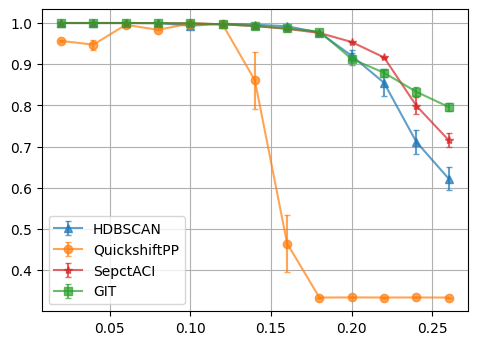

In [29]:
plt.figure(figsize=(5.5, 4),dpi=100)
noise_levels = [0.02*i for i in range(1,14)]


mean_std = Fscores_HDBSCAN
plt.errorbar(noise_levels, np.array(mean_std)[:,0], yerr=np.array(mean_std)[:,1], label='HDBSCAN',capsize=2,marker='^',c='C0',alpha=0.7)

mean_std = Fscores_QuickshiftPP
plt.errorbar(noise_levels, np.array(mean_std)[:,0], yerr=np.array(mean_std)[:,1], label='QuickshiftPP',capsize=2,marker='o',c='C1',alpha=0.7)

mean_std = Fscores_sepctACI
plt.errorbar(noise_levels, np.array(mean_std)[:,0], yerr=np.array(mean_std)[:,1], label='SepctACI',capsize=2,marker='*',c='C3',alpha=0.7)

mean_std = Fscores_GIT
plt.errorbar(noise_levels, np.array(mean_std)[:,0], yerr=np.array(mean_std)[:,1], label='GIT',capsize=2,marker='s',c='C2',alpha=0.7)

plt.legend()
# plt.xticks([0.02*i for i in range(1,14)])
plt.grid(True)

plt.savefig('./figs/change_noise.png',bbox_inches = 'tight',pad_inches = 0.01,dpi=200)

# circles change scales

In [24]:
Fscores2_GIT=[]
for scale in [10*i for i in range(0,11)]:
    if scale>0:
        X1,Y_true1 = get_circles(0.15)
        X2,Y_true2 = get_circles(0.15)
        X2 = -X2*scale

        X = np.concatenate([X1,X2],axis=0)
        Y_true = np.concatenate([Y_true1,Y_true2+2]).astype(np.int)
        Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=25,
                  target_ratio=[1,1,1,1],
                  plot=False,
                 )
    else:
        X,Y_true = get_circles(0.15)
        Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=25,
                  target_ratio=[1,1],
                  plot=False,
                 )
    
    Y_pred, Y_true = matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    Fscores2_GIT.append(result.values[0,0])
print(Fscores2_GIT)

[0.9739949030009882, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403, 0.9734951694946403]


In [25]:
Fscores2_Spectacl=[]
for scale in [10*i for i in range(0,11)]:
    if scale>0:
        X1,Y_true1 = get_circles(0.15)
        X2,Y_true2 = get_circles(0.15)
        X2 = -X2*scale

        X = np.concatenate([X1,X2],axis=0)
        Y_true = np.concatenate([Y_true1,Y_true2+2]).astype(np.int)
        Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=4, epsilon=2).fit_predict(X)
    else:
        X,Y_true = get_circles(0.15)
        Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=2).fit_predict(X)
    
    
    Y_pred, Y_true = matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    Fscores2_Spectacl.append(result.values[0,0])
print(Fscores2_Spectacl)

[0.955918493294101, 0.9250951654805604, 0.892924264805117, 0.5944534054085473, 0.5965469321918233, 0.5965469321918233, 0.5965469321918233, 0.5965469321918233, 0.5965469321918233, 0.5965469321918233, 0.5965469321918233]


In [26]:
Fscores2_QuickshiftPP=[]
for scale in [10*i for i in range(0,11)]:
    if scale>0:
        X1,Y_true1 = get_circles(0.15)
        X2,Y_true2 = get_circles(0.15)
        X2 = -X2*scale

        X = np.concatenate([X1,X2],axis=0)
        Y_true = np.concatenate([Y_true1,Y_true2+2]).astype(np.int)
    else:
        X,Y_true = get_circles(0.15)
    model = QuickshiftPP(k=5,beta=0.9)
    model.fit([X[i] for i in range(X.shape[0])])
    Y_pred = model.memberships
    
    Y_pred, Y_true = matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    Fscores2_QuickshiftPP.append(result.values[0,0])
print(Fscores2_QuickshiftPP)

[0.6819580010364507, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106, 0.5388131740720106]


In [27]:
Fscores2_HDBSCAN=[]
for scale in [10*i for i in range(0,11)]:
    if scale>0:
        X1,Y_true1 = get_circles(0.15)
        X2,Y_true2 = get_circles(0.15)
        X2 = -X2*scale

        X = np.concatenate([X1,X2],axis=0)
        Y_true = np.concatenate([Y_true1,Y_true2+2]).astype(np.int)
    else:
        X,Y_true = get_circles(0.15)
    clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=2)
    clusterer.fit(X)
    Y_pred=clusterer.labels_
    
    Y_pred, Y_true = matchY(Y_pred,Y_true)
    result=measures_calculator(Y_true,Y_pred)
    Fscores2_HDBSCAN.append(result.values[0,0])
print(Fscores2_HDBSCAN)

[0.9209012977883358, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


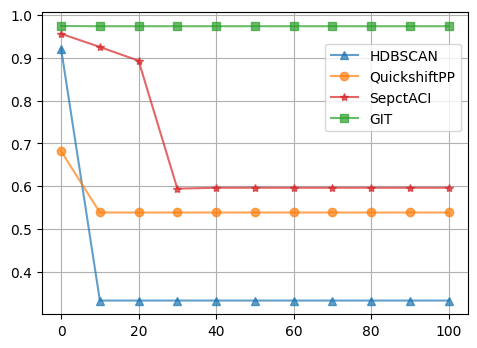

In [30]:
plt.figure(figsize=(5.5, 4),dpi=100)
scales = [10*i for i in range(0,11)]


plt.plot(scales,Fscores2_HDBSCAN, label='HDBSCAN',marker='^',c='C0',alpha=0.7)
plt.plot(scales, Fscores2_QuickshiftPP, label='QuickshiftPP',marker='o',c='C1',alpha=0.7)
plt.plot(scales,Fscores2_Spectacl, label='SepctACI',marker='*',c='C3',alpha=0.7)
plt.plot(scales, Fscores2_GIT, label='GIT',marker='s',c='C2',alpha=0.7)

plt.legend(loc='center right',bbox_to_anchor=(0., 0.7, 1., .102))
plt.grid(True)

plt.savefig('./figs/change_scale.png',bbox_inches = 'tight',pad_inches = 0.01,dpi=200)